In [2]:
!pip3 install git+https://github.com/holounic/Bayesian-Optimization.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/holounic/Bayesian-Optimization.git to /tmp/pip-req-build-2r2gkvyq
  Running command git clone -q https://github.com/holounic/Bayesian-Optimization.git /tmp/pip-req-build-2r2gkvyq
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Cloning https://github.com/holounic/pyDOE to /tmp/pip-install-41z8d7on/pydoe_f4bd6935534543068d0585442cf96ea2
  Running command git clone -q https://github.com/holounic/pyDOE /tmp/pip-install-41z8d7on/pydoe_f4bd6935534543068d0585442cf96ea2
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 316 kB 21.1 MB/s 
  Created wheel for bayes-optim: filename=bayes_optim-0.2.7-py3-none-any.whl size=145057 sha256=1fdd830cacb8be193ddd00e1c10914444d11285faa5595e44ba29f2ce75d8af5
  Stored in directory: /tmp/pip-ephem-wheel-cache-

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from benchmark.bbobbenchmarks import F9
from bayes_optim.search_space import RealSpace

In [4]:
dim = 2
lb, ub = -5, 5
space = RealSpace([lb, ub]) * dim
f_name = 'f9'
f = F9

samples = space.sample(50000)

In [5]:
def fix_numeric_data(df):
  regrets = [float(x[1:-1]) for x in df['regret'].tolist()]
  df['regret'] = regrets
  return df

In [6]:
def minmax_normalisation():
  minmax = []
  for i in range(50):
    func = f(i)
    minmax.append(func(samples).max() - func.getfopt())
  return minmax

In [7]:
def abs_normalisation():
  n = []
  for i in range(50):
    func = f(i)
    n.append(func(samples).mean() - func.getfopt())
  return n

In [37]:
cma_es_50 = fix_numeric_data(pd.read_csv(f'{f_name}_cma_es_doe_normalized_50.csv')[['regret', 'f_s', 'min_dist_to_opt']]).rename(columns={'regret': 'cma_es_50_regret', 'min_dist_to_opt': 'dopt_50_cma'})
cma_es_init_50 = fix_numeric_data(pd.read_csv(f'{f_name}_lhs_initial_doe_normalized_50.csv')[['regret', 'f_s', 'min_dist_to_opt']]).rename(columns={'regret': 'lhs_init_50_regret', 'min_dist_to_opt': 'dopt_50_init'})
cma_es = fix_numeric_data(pd.read_csv(f'{f_name}_cma_es_doe_normalized.csv')[['regret', 'f_s', 'min_dist_to_opt']]).rename(columns={'regret': 'cma_es_regret', 'min_dist_to_opt': 'dopt_cma'})
cma_es_init = fix_numeric_data(pd.read_csv(f'{f_name}_lhs_initial_doe_normalized.csv')[['regret', 'f_s', 'min_dist_to_opt']]).rename(columns={'regret': 'lhs_init_regret', 'min_dist_to_opt': 'dopt_init'})
uniform = fix_numeric_data(pd.read_csv(f'uniform_doe_{f_name}.csv')[['regret', 'f_s', 'min_dist_to_opt']]).rename(columns={'regret': 'uniform_regret', 'min_dist_to_opt': 'dopt_uni'})
lhs = fix_numeric_data(pd.read_csv(f'lhs_doe_{f_name}.csv')[['regret', 'f_s', 'min_dist_to_opt']]).rename(columns={'regret': 'lhs_regret', 'min_dist_to_opt': 'dopt_lhs'})
halton = fix_numeric_data(pd.read_csv(f'halton_doe_{f_name}.csv')[['regret', 'f_s', 'min_dist_to_opt']]).rename(columns={'regret': 'halton_regret', 'min_dist_to_opt': 'dopt_hal'})
sobol = fix_numeric_data(pd.read_csv(f'sobol_doe_{f_name}.csv')[['regret', 'f_s', 'min_dist_to_opt']]).rename(columns={'regret': 'sobol_regret', 'min_dist_to_opt': 'dopt_sob'})
stats = cma_es_50.merge(cma_es_init_50.merge(cma_es.merge(uniform.merge(lhs.merge(sobol.merge(halton.merge(cma_es_init)))))))
stats['minmax_norm'] = minmax_normalisation()
stats['abs_norm'] = abs_normalisation()
stats.head()

,cma_es_50_regret,f_s,dopt_50_cma,lhs_init_50_regret,dopt_50_init,cma_es_regret,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
0,11.366175,0,0.314482,10.927088,1.528428,0.663671,0.340654,7.871626,3.480925,7.987268,1.980372,0.948432,1.042709,1.980730,2.784141,1.158260,2.802967,244987.401949,15456.843074
1,9.137781,1,0.453820,4.279611,1.772223,2.632773,0.434271,0.613708,1.931839,1.259330,1.326769,35.314736,2.787093,1.258125,2.417295,3.501588,2.661393,304502.693094,17886.191003
2,3.264269,2,1.055891,1.967401,1.003960,1.376448,0.988343,8.636624,1.769060,11.397823,2.285068,1.080733,1.091367,2.353210,1.991689,9.845075,1.954974,313840.013242,17832.828042
3,1.105251,3,0.661136,1.315602,1.341638,1.291830,0.693038,13.714469,1.307633,0.089657,2.690338,3.516776,2.397855,1.179184,2.597743,13.603137,2.537715,249673.243667,16850.752147
4,3.498598,4,0.280026,6.846770,1.406859,1.137312,0.333834,10.843660,1.251042,1.091171,2.850873,7.726755,1.125662,0.935026,0.640180,0.613578,2.832712,161164.492601,13971.982923


# CMA-ES on 20 iterations

## vs first individual (generated by LHS)

In [31]:
cma_init = stats.loc[stats['cma_es_regret'] < stats['lhs_init_regret']]
print(f'CMA-ES improved lhs DoE on {cma_init.shape[0]}, ({100 * cma_init.shape[0] / stats.shape[0]}%) function instances')
cma_init[['f_s', 'cma_es_regret', 'lhs_init_regret', 'dopt_cma', 'dopt_init']]

CMA-ES improved lhs DoE on 26, (52.0%) function instances


,f_s,cma_es_regret,lhs_init_regret,dopt_cma,dopt_init
0,0,0.663671,1.158260,0.340654,2.802967
1,1,2.632773,3.501588,0.434271,2.661393
2,2,1.376448,9.845075,0.988343,1.954974
3,3,1.291830,13.603137,0.693038,2.537715
6,6,1.416331,5.806288,0.409309,2.896115
7,7,2.281067,3.188178,0.488672,2.748370
8,8,1.821276,2.777489,0.483265,2.559434
10,10,0.029826,2.246077,0.360088,2.805795
13,13,2.409652,6.896790,1.082609,2.393389
15,15,1.277202,5.563395,0.950109,2.692087


In [11]:
cma_init = stats.loc[stats['cma_es_regret'] > stats['lhs_init_regret']]
print(f'CMA-ES worstened lhs DoE on {cma_init.shape[0]}, ({100 * cma_init.shape[0] / stats.shape[0]}%) function instances')
cma_init[['f_s', 'cma_es_regret', 'lhs_init_regret', 'dopt_cma', 'dopt_init']]

CMA-ES worstened lhs DoE on 24, (48.0%) function instances


,f_s,cma_es_regret,lhs_init_regret,dopt_cma,dopt_init
4,4,1.137312,0.613578,0.333834,2.832712
5,5,1.209525,1.068427,0.913981,2.627646
9,9,2.214928,1.129575,0.737452,2.523669
11,11,8.083735,3.452043,1.030620,2.863939
12,12,1.115279,0.212665,0.332162,2.811885
14,14,13.894311,7.067577,0.363877,2.807368
17,17,9.091213,7.581802,0.804641,2.019450
18,18,18.491337,7.317862,0.429312,2.672246
19,19,8.116658,0.768788,1.029828,2.867139
20,20,0.555215,0.098796,1.031305,2.861148


## vs Uniform

In [12]:
cma_uniform = stats.loc[stats['cma_es_regret'] < stats['uniform_regret']]
print(f'DoE generated by CMA-ES is better than uniformly sampled DoE on {cma_uniform.shape[0]}, ({100 * cma_uniform.shape[0] / stats.shape[0]}%) function instances')
cma_uniform[['f_s', 'cma_es_regret', 'uniform_regret']]

DoE generated by CMA-ES is better than uniformly sampled DoE on 28, (56.0%) function instances


,f_s,cma_es_regret,uniform_regret
0,0,0.663671,7.871626
2,2,1.376448,8.636624
3,3,1.291830,13.714469
4,4,1.137312,10.843660
6,6,1.416331,1.713469
8,8,1.821276,1.898802
9,9,2.214928,2.608004
10,10,0.029826,0.940355
12,12,1.115279,2.305583
15,15,1.277202,2.242877


## vs LHS

In [13]:
cma_lhs = stats.loc[stats['cma_es_regret'] < stats['lhs_regret']]
print(f'DoE generated by CMA-ES is better than lhs sampled DoE on {cma_lhs.shape[0]} ({100 * cma_lhs.shape[0] / stats.shape[0]}%) function instances')
cma_lhs[['f_s', 'cma_es_regret', 'lhs_regret', 'dopt_cma', 'dopt_lhs']]

DoE generated by CMA-ES is better than lhs sampled DoE on 27 (54.0%) function instances


,f_s,cma_es_regret,lhs_regret,dopt_cma,dopt_lhs
0,0,0.663671,7.987268,0.340654,1.980372
2,2,1.376448,11.397823,0.988343,2.285068
5,5,1.209525,3.410188,0.913981,0.983183
7,7,2.281067,3.433421,0.488672,0.371154
8,8,1.821276,9.476410,0.483265,1.015701
9,9,2.214928,9.261820,0.737452,1.916778
10,10,0.029826,21.986641,0.360088,0.561223
12,12,1.115279,1.723304,0.332162,2.382693
15,15,1.277202,12.911129,0.950109,0.367148
16,16,0.114240,1.290099,0.506623,2.614941


## vs Sobol

In [14]:
cma_sobol = stats.loc[stats['cma_es_regret'] < stats['sobol_regret']]
print(f'DoE generated by CMA-ES is better than sobol generated DoE on {cma_sobol.shape[0]} ({100 * cma_sobol.shape[0] / stats.shape[0]}%) function instances')
cma_sobol[['f_s', 'cma_es_regret', 'sobol_regret', 'dopt_cma', 'dopt_sob']]

DoE generated by CMA-ES is better than sobol generated DoE on 31 (62.0%) function instances


,f_s,cma_es_regret,sobol_regret,dopt_cma,dopt_sob
0,0,0.663671,0.948432,0.340654,1.042709
1,1,2.632773,35.314736,0.434271,2.787093
3,3,1.291830,3.516776,0.693038,2.397855
4,4,1.137312,7.726755,0.333834,1.125662
5,5,1.209525,2.262532,0.913981,1.820724
6,6,1.416331,19.563950,0.409309,0.722710
7,7,2.281067,2.736550,0.488672,2.368989
8,8,1.821276,9.299595,0.483265,1.155288
12,12,1.115279,3.983103,0.332162,1.009600
13,13,2.409652,9.364581,1.082609,1.734131


## vs Halton

In [15]:
cma_halton = stats.loc[stats['cma_es_regret'] < stats['halton_regret']]
print(f'DoE generated by CMA-ES is better than halton generated DoE on {cma_halton.shape[0]} ({100 * cma_halton.shape[0] / stats.shape[0]}%) function instances')
cma_halton[['f_s', 'cma_es_regret', 'halton_regret', 'dopt_cma', 'dopt_hal']]

DoE generated by CMA-ES is better than halton generated DoE on 30 (60.0%) function instances


,f_s,cma_es_regret,halton_regret,dopt_cma,dopt_hal
0,0,0.663671,1.980730,0.340654,2.784141
2,2,1.376448,2.353210,0.988343,1.991689
5,5,1.209525,3.888837,0.913981,1.127369
6,6,1.416331,44.392702,0.409309,1.377588
7,7,2.281067,12.588130,0.488672,2.435214
8,8,1.821276,12.350358,0.483265,0.899837
10,10,0.029826,32.267672,0.360088,2.534150
12,12,1.115279,1.552930,0.332162,2.150129
13,13,2.409652,12.207828,1.082609,1.851455
15,15,1.277202,2.548898,0.950109,1.887891


## vs CMA-ES 50

In [63]:
cma_halton = stats.loc[stats['cma_es_50_regret'] > stats['cma_es_regret']]
print(f'DoE generated by CMA-ES is better than halton generated DoE on {cma_halton.shape[0]} ({100 * cma_halton.shape[0] / stats.shape[0]}%) function instances')
cma_halton[['f_s', 'cma_es_50_regret', 'cma_es_regret', 'dopt_50_cma', 'dopt_cma']]

DoE generated by CMA-ES is better than halton generated DoE on 22 (44.0%) function instances


,f_s,cma_es_50_regret,cma_es_regret,dopt_50_cma,dopt_cma
0,0,11.366175,0.663671,0.314482,0.340654
1,1,9.137781,2.632773,0.453820,0.434271
2,2,3.264269,1.376448,1.055891,0.988343
4,4,3.498598,1.137312,0.280026,0.333834
5,5,10.552651,1.209525,0.916765,0.913981
7,7,2.446003,2.281067,0.428820,0.488672
10,10,0.040384,0.029826,0.349658,0.360088
15,15,11.109766,1.277202,0.959547,0.950109
16,16,3.772530,0.114240,0.449022,0.506623
20,20,9.061545,0.555215,1.058552,1.031305


## Best

In [53]:
best_name = 'cma_es_regret'
cma_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['cma_es_50_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'DoE generated by CMA-ES is better than any baseline generated DoE on {cma_is_best.shape[0]} ({100 * cma_is_best.shape[0] / stats.shape[0]}%) function instances')
cma_is_best

DoE generated by CMA-ES is better than any baseline generated DoE on 12 (24.0%) function instances


,cma_es_50_regret,f_s,dopt_50_cma,lhs_init_50_regret,dopt_50_init,cma_es_regret,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
0,11.366175,0,0.314482,10.927088,1.528428,0.663671,0.340654,7.871626,3.480925,7.987268,1.980372,0.948432,1.042709,1.980730,2.784141,1.158260,2.802967,244987.401949,15456.843074
15,11.109766,15,0.959547,4.617109,0.799278,1.277202,0.950109,2.242877,1.699021,12.911129,0.367148,2.833821,0.606485,2.548898,1.887891,5.563395,2.692087,181519.233155,15309.572855
20,9.061545,20,1.058552,1.059362,0.527581,0.555215,1.031305,3.985969,1.571632,0.961709,1.627184,6.011878,2.453047,7.879515,2.817866,0.098796,2.861148,321621.785730,17861.546937
21,0.523323,21,1.120956,0.036066,0.686872,0.338141,1.059690,4.995174,2.481128,4.724310,1.150631,0.686224,3.080798,0.879975,3.144165,4.362185,2.135659,204318.288201,14663.471633
22,4.242002,22,0.822222,6.122439,1.487715,0.318393,0.759065,1.792093,2.726076,2.185955,0.716201,1.154002,1.924650,3.456411,2.779514,0.709675,2.078886,97054.558114,13879.805447
27,2.176192,27,1.047149,29.030912,1.033084,0.957593,0.979300,8.657223,3.214484,4.614692,1.778579,12.428725,2.827299,1.677049,1.425145,0.211086,1.946488,313991.059462,17877.545212
31,1.777245,31,0.300225,1.487851,1.491801,0.172488,0.334679,0.878476,1.209162,3.281923,0.954664,0.783653,2.023618,17.108405,3.016766,1.831964,2.806641,222922.767495,14951.657527
32,0.450219,32,1.113486,3.720971,0.741128,0.403986,1.050756,5.572169,1.006297,1.146067,0.969167,0.656323,2.040899,4.517266,2.082367,0.627986,2.094384,231804.554408,15254.074425
43,1.970011,43,1.067633,90.097087,0.961878,0.372661,1.000607,1.950070,2.028328,2.428657,1.678549,7.282604,1.122930,1.324841,1.514004,2.338229,1.969942,309415.709299,17592.427319
47,0.601641,47,0.285319,4.203713,1.350682,0.161797,0.349707,5.433781,2.291778,3.842570,0.566299,0.836084,2.879643,1.319579,2.812243,4.889009,2.872531,111576.174462,13758.480874


## Initial individual

In [61]:
best_name = 'lhs_init_regret'
lhs_init_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['cma_es_50_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'LHS init is the best on {lhs_init_is_best.shape[0]} ({100 * lhs_init_is_best.shape[0] / stats.shape[0]}%) function instances')
lhs_init_is_best

LHS init is the best on 6 (12.0%) function instances


,cma_es_50_regret,f_s,dopt_50_cma,lhs_init_50_regret,dopt_50_init,cma_es_regret,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
4,3.498598,4,0.280026,6.846770,1.406859,1.137312,0.333834,10.843660,1.251042,1.091171,2.850873,7.726755,1.125662,0.935026,0.640180,0.613578,2.832712,161164.492601,13971.982923
19,5.213736,19,1.056687,12.870223,0.533200,8.116658,1.029828,16.842176,0.859324,9.915496,1.513756,43.838734,1.049226,0.867613,2.120118,0.768788,2.867139,321681.147213,17842.122213
20,9.061545,20,1.058552,1.059362,0.527581,0.555215,1.031305,3.985969,1.571632,0.961709,1.627184,6.011878,2.453047,7.879515,2.817866,0.098796,2.861148,321621.785730,17861.546937
23,12.725093,23,1.051194,12.333023,1.019820,14.785165,0.983476,13.661168,2.746115,3.573113,1.080282,1.309886,0.652244,1.387065,1.957975,0.119977,1.950157,311157.409001,17841.817250
27,2.176192,27,1.047149,29.030912,1.033084,0.957593,0.979300,8.657223,3.214484,4.614692,1.778579,12.428725,2.827299,1.677049,1.425145,0.211086,1.946488,313991.059462,17877.545212
34,1.679382,34,1.081543,3.364371,0.906550,22.847084,1.015350,10.442363,1.878829,3.200582,1.441243,0.865419,0.870310,2.283725,1.328848,0.179367,1.994188,271722.645850,17106.305570


# CMA-ES on 50 iterations

## vs first individual (generated by LHS)

In [38]:
cma_init = stats.loc[stats['cma_es_50_regret'] < stats['lhs_init_50_regret']]
print(f'CMA-ES improved lhs DoE on {cma_init.shape[0]}, ({100 * cma_init.shape[0] / stats.shape[0]}%) function instances')
cma_init[['f_s', 'cma_es_50_regret', 'lhs_init_50_regret', 'dopt_50_cma', 'dopt_50_init']]

CMA-ES improved lhs DoE on 29, (58.0%) function instances


,f_s,cma_es_50_regret,lhs_init_50_regret,dopt_50_cma,dopt_50_init
3,3,1.105251,1.315602,0.661136,1.341638
4,4,3.498598,6.846770,0.280026,1.406859
6,6,0.437308,2.967591,0.341520,1.295631
9,9,1.456785,10.156587,0.712038,1.269025
10,10,0.040384,0.177998,0.349658,1.603972
11,11,3.600143,3.980047,1.057687,0.530189
12,12,0.184325,7.240719,0.291492,1.464924
13,13,0.975274,2.437038,1.133915,0.442009
14,14,0.689821,8.738733,0.355749,1.615977
19,19,5.213736,12.870223,1.056687,0.533200


In [39]:
cma_init = stats.loc[stats['cma_es_50_regret'] > stats['lhs_init_50_regret']]
print(f'CMA-ES worstened lhs DoE on {cma_init.shape[0]}, ({100 * cma_init.shape[0] / stats.shape[0]}%) function instances')
cma_init[['f_s', 'cma_es_50_regret', 'lhs_init_50_regret', 'dopt_50_cma', 'dopt_50_init']]

CMA-ES worstened lhs DoE on 21, (42.0%) function instances


,f_s,cma_es_50_regret,lhs_init_50_regret,dopt_50_cma,dopt_50_init
0,0,11.366175,10.927088,0.314482,1.528428
1,1,9.137781,4.279611,0.453820,1.772223
2,2,3.264269,1.967401,1.055891,1.003960
5,5,10.552651,3.804223,0.916765,0.898545
7,7,2.446003,1.195484,0.428820,1.306751
8,8,0.740874,0.047914,0.514505,1.747974
15,15,11.109766,4.617109,0.959547,0.799278
16,16,3.772530,3.380538,0.449022,1.316849
17,17,5.503986,1.704860,0.870175,1.419539
18,18,1.890086,1.585955,0.447450,1.774303


## vs Uniform

In [40]:
cma_uniform = stats.loc[stats['cma_es_50_regret'] < stats['uniform_regret']]
print(f'DoE generated by CMA-ES is better than uniformly sampled DoE on {cma_uniform.shape[0]}, ({100 * cma_uniform.shape[0] / stats.shape[0]}%) function instances')
cma_uniform[['f_s', 'cma_es_50_regret', 'uniform_regret', 'dopt_50_cma', 'dopt_uni']]

DoE generated by CMA-ES is better than uniformly sampled DoE on 30, (60.0%) function instances


,f_s,cma_es_50_regret,uniform_regret,dopt_50_cma,dopt_uni
2,2,3.264269,8.636624,1.055891,1.769060
3,3,1.105251,13.714469,0.661136,1.307633
4,4,3.498598,10.843660,0.280026,1.251042
6,6,0.437308,1.713469,0.341520,1.240113
8,8,0.740874,1.898802,0.514505,0.217964
9,9,1.456785,2.608004,0.712038,1.398873
10,10,0.040384,0.940355,0.349658,1.223901
11,11,3.600143,7.485821,1.057687,0.713796
12,12,0.184325,2.305583,0.291492,0.664965
14,14,0.689821,8.737861,0.355749,2.342028


## vs LHS

In [41]:
cma_lhs = stats.loc[stats['cma_es_50_regret'] < stats['lhs_regret']]
print(f'DoE generated by CMA-ES is better than lhs sampled DoE on {cma_lhs.shape[0]} ({100 * cma_lhs.shape[0] / stats.shape[0]}%) function instances')
cma_lhs[['f_s', 'cma_es_50_regret', 'lhs_regret', 'dopt_50_cma', 'dopt_lhs']]

DoE generated by CMA-ES is better than lhs sampled DoE on 31 (62.0%) function instances


,f_s,cma_es_50_regret,lhs_regret,dopt_50_cma,dopt_lhs
2,2,3.264269,11.397823,1.055891,2.285068
6,6,0.437308,0.594357,0.341520,1.099619
7,7,2.446003,3.433421,0.428820,0.371154
8,8,0.740874,9.476410,0.514505,1.015701
9,9,1.456785,9.261820,0.712038,1.916778
10,10,0.040384,21.986641,0.349658,0.561223
12,12,0.184325,1.723304,0.291492,2.382693
13,13,0.975274,1.355985,1.133915,2.313554
14,14,0.689821,1.126603,0.355749,0.733688
15,15,11.109766,12.911129,0.959547,0.367148


## vs Sobol

In [42]:
cma_sobol = stats.loc[stats['cma_es_50_regret'] < stats['sobol_regret']]
print(f'DoE generated by CMA-ES is better than sobol generated DoE on {cma_sobol.shape[0]} ({100 * cma_sobol.shape[0] / stats.shape[0]}%) function instances')
cma_sobol[['f_s', 'cma_es_50_regret', 'sobol_regret', 'dopt_50_cma', 'dopt_sob']]

DoE generated by CMA-ES is better than sobol generated DoE on 28 (56.0%) function instances


,f_s,cma_es_50_regret,sobol_regret,dopt_50_cma,dopt_sob
1,1,9.137781,35.314736,0.453820,2.787093
3,3,1.105251,3.516776,0.661136,2.397855
4,4,3.498598,7.726755,0.280026,1.125662
6,6,0.437308,19.563950,0.341520,0.722710
7,7,2.446003,2.736550,0.428820,2.368989
8,8,0.740874,9.299595,0.514505,1.155288
11,11,3.600143,5.334335,1.057687,1.895443
12,12,0.184325,3.983103,0.291492,1.009600
13,13,0.975274,9.364581,1.133915,1.734131
14,14,0.689821,0.961662,0.355749,2.027602


## vs Halton

In [43]:
cma_halton = stats.loc[stats['cma_es_50_regret'] < stats['halton_regret']]
print(f'DoE generated by CMA-ES is better than halton generated DoE on {cma_halton.shape[0]} ({100 * cma_halton.shape[0] / stats.shape[0]}%) function instances')
cma_halton[['f_s', 'cma_es_50_regret', 'halton_regret', 'dopt_50_cma', 'dopt_hal']]

DoE generated by CMA-ES is better than halton generated DoE on 29 (58.0%) function instances


,f_s,cma_es_50_regret,halton_regret,dopt_50_cma,dopt_hal
3,3,1.105251,1.179184,0.661136,2.597743
6,6,0.437308,44.392702,0.341520,1.377588
7,7,2.446003,12.588130,0.428820,2.435214
8,8,0.740874,12.350358,0.514505,0.899837
10,10,0.040384,32.267672,0.349658,2.534150
12,12,0.184325,1.552930,0.291492,2.150129
13,13,0.975274,12.207828,1.133915,1.851455
14,14,0.689821,10.514041,0.355749,2.556235
16,16,3.772530,4.992756,0.449022,2.089822
17,17,5.503986,12.285427,0.870175,2.096566


## vs CMA-ES 20

In [62]:
cma_halton = stats.loc[stats['cma_es_50_regret'] < stats['cma_es_regret']]
print(f'DoE generated by CMA-ES is better than halton generated DoE on {cma_halton.shape[0]} ({100 * cma_halton.shape[0] / stats.shape[0]}%) function instances')
cma_halton[['f_s', 'cma_es_50_regret', 'cma_es_regret', 'dopt_50_cma', 'dopt_cma']]

DoE generated by CMA-ES is better than halton generated DoE on 28 (56.0%) function instances


,f_s,cma_es_50_regret,cma_es_regret,dopt_50_cma,dopt_cma
3,3,1.105251,1.291830,0.661136,0.693038
6,6,0.437308,1.416331,0.341520,0.409309
8,8,0.740874,1.821276,0.514505,0.483265
9,9,1.456785,2.214928,0.712038,0.737452
11,11,3.600143,8.083735,1.057687,1.030620
12,12,0.184325,1.115279,0.291492,0.332162
13,13,0.975274,2.409652,1.133915,1.082609
14,14,0.689821,13.894311,0.355749,0.363877
17,17,5.503986,9.091213,0.870175,0.804641
18,18,1.890086,18.491337,0.447450,0.429312


## Best percentage

In [52]:
best_name = 'cma_es_50_regret'
cma_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['cma_es_50_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'DoE generated by CMA-ES is better than any baseline generated DoE on {cma_is_best.shape[0]} ({100 * cma_is_best.shape[0] / stats.shape[0]}%) function instances')
cma_is_best

DoE generated by CMA-ES is better than any baseline generated DoE on 9 (18.0%) function instances


,cma_es_50_regret,f_s,dopt_50_cma,lhs_init_50_regret,dopt_50_init,cma_es_regret,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
6,0.437308,6,0.341520,2.967591,1.295631,1.416331,0.409309,1.713469,1.240113,0.594357,1.099619,19.563950,0.722710,44.392702,1.377588,5.806288,2.896115,162309.126929,14918.632041
8,0.740874,8,0.514505,0.047914,1.747974,1.821276,0.483265,1.898802,0.217964,9.476410,1.015701,9.299595,1.155288,12.350358,0.899837,2.777489,2.559434,296150.857940,17822.492522
12,0.184325,12,0.291492,7.240719,1.464924,1.115279,0.332162,2.305583,0.664965,1.723304,2.382693,3.983103,1.009600,1.552930,2.150129,0.212665,2.811885,143928.775355,14571.952790
14,0.689821,14,0.355749,8.738733,1.615977,13.894311,0.363877,8.737861,2.342028,1.126603,0.733688,0.961662,2.027602,10.514041,2.556235,7.067577,2.807368,285925.463351,16621.687181
30,0.059153,30,0.782522,11.974907,1.537000,2.428735,0.721790,1.200646,2.720649,0.178725,0.775866,13.332368,1.527043,6.699673,1.949744,0.073579,2.133748,107230.432278,13791.442047
35,0.024534,35,0.299315,2.335557,1.323702,0.074026,0.366997,0.278939,1.246854,1.615395,1.467780,16.100839,0.826026,3.839465,1.909630,2.198602,2.906106,98898.785878,13964.917855
36,0.157466,36,0.672750,47.478644,1.325612,2.546963,0.703183,2.861624,2.048331,0.924787,1.334788,2.861624,2.918690,2.861624,0.315000,0.296741,2.533364,279828.125443,16479.774282
42,0.784457,42,1.095874,3.641290,0.841046,0.871520,1.030879,6.058447,1.595343,10.056873,2.219657,2.206037,0.583092,6.597757,1.351608,4.459129,2.029118,275984.291396,16432.872624
45,0.367510,45,0.289891,0.524518,1.339179,12.059129,0.355891,1.848285,0.917995,3.127600,1.469916,2.245915,2.045266,0.879669,0.774443,10.838121,2.884997,140200.731545,13844.359310


## Initial individual

In [60]:
best_name = 'lhs_init_50_regret'
lhs_init_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['cma_es_50_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'LHS init is the best on {lhs_init_is_best.shape[0]} ({100 * lhs_init_is_best.shape[0] / stats.shape[0]}%) function instances')
lhs_init_is_best

LHS init is the best on 5 (10.0%) function instances


,cma_es_50_regret,f_s,dopt_50_cma,lhs_init_50_regret,dopt_50_init,cma_es_regret,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
7,2.446003,7,0.428820,1.195484,1.306751,2.281067,0.488672,2.248113,1.204095,3.433421,0.371154,2.736550,2.368989,12.588130,2.435214,3.188178,2.748370,254243.114586,16866.426067
8,0.740874,8,0.514505,0.047914,1.747974,1.821276,0.483265,1.898802,0.217964,9.476410,1.015701,9.299595,1.155288,12.350358,0.899837,2.777489,2.559434,296150.857940,17822.492522
21,0.523323,21,1.120956,0.036066,0.686872,0.338141,1.059690,4.995174,2.481128,4.724310,1.150631,0.686224,3.080798,0.879975,3.144165,4.362185,2.135659,204318.288201,14663.471633
26,8.636996,26,0.900744,0.071437,1.370261,9.411305,0.834018,3.728510,1.655609,3.010716,0.562606,0.435151,1.871141,0.914872,0.589154,4.250217,1.986933,169998.402798,15096.294509
48,7.805319,48,0.999009,0.726541,1.169161,1.008904,0.930470,29.894854,2.644166,12.408967,1.708438,4.207909,0.863339,10.096357,0.832079,12.203548,1.929433,287905.578241,17584.098544


# Baselines

## Uniform

In [51]:
best_name = 'uniform_regret'
uniform_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['cma_es_50_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'Uniform is the best on {uniform_is_best.shape[0]} ({100 * uniform_is_best.shape[0] / stats.shape[0]}%) function instances')
uniform_is_best

Uniform is the best on 9 (18.0%) function instances


,cma_es_50_regret,f_s,dopt_50_cma,lhs_init_50_regret,dopt_50_init,cma_es_regret,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
1,9.137781,1,0.453820,4.279611,1.772223,2.632773,0.434271,0.613708,1.931839,1.259330,1.326769,35.314736,2.787093,1.258125,2.417295,3.501588,2.661393,304502.693094,17886.191003
5,10.552651,5,0.916765,3.804223,0.898545,1.209525,0.913981,0.026164,1.743600,3.410188,0.983183,2.262532,1.820724,3.888837,1.127369,1.068427,2.627646,124010.557387,14299.315318
7,2.446003,7,0.428820,1.195484,1.306751,2.281067,0.488672,2.248113,1.204095,3.433421,0.371154,2.736550,2.368989,12.588130,2.435214,3.188178,2.748370,254243.114586,16866.426067
13,0.975274,13,1.133915,2.437038,0.442009,2.409652,1.082609,0.744077,1.823746,1.355985,2.313554,9.364581,1.734131,12.207828,1.851455,6.896790,2.393389,116920.928723,14175.267631
16,3.772530,16,0.449022,3.380538,1.316849,0.114240,0.506623,0.048751,4.068317,1.290099,2.614941,0.582180,3.116677,4.992756,2.089822,0.691780,2.720965,269615.715006,17210.271970
17,5.503986,17,0.870175,1.704860,1.419539,9.091213,0.804641,0.439079,1.061483,0.600776,2.392402,10.720931,2.831102,12.285427,2.096566,7.581802,2.019450,133135.882936,14460.690540
28,1.460433,28,1.129129,2.348407,0.608359,3.266944,1.070318,0.653864,2.947095,0.684391,1.484183,2.544718,3.272192,3.890236,2.573510,2.998209,2.203029,103233.215554,14084.335024
37,13.586149,37,0.941005,3.292931,1.296941,1.785263,0.873128,0.000489,3.216958,10.687222,1.200325,16.765293,1.961020,1.046115,1.839525,0.113155,1.952913,272723.820844,16064.651304
46,16.325711,46,0.597949,5.332830,1.423701,29.350354,0.637737,1.120578,1.988656,22.876955,2.395413,1.311137,2.987348,4.405798,1.675844,2.202959,2.572407,294386.555345,17790.582732


## Halton

In [48]:
best_name = 'halton_regret'
halton_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['cma_es_50_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'Halton is the best on {halton_is_best.shape[0]} ({100 * halton_is_best.shape[0] / stats.shape[0]}%) function instances')
halton_is_best

Halton is the best on 5 (10.0%) function instances


,cma_es_50_regret,f_s,dopt_50_cma,lhs_init_50_regret,dopt_50_init,cma_es_regret,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
4,3.498598,4,0.280026,6.846770,1.406859,1.137312,0.333834,10.843660,1.251042,1.091171,2.850873,7.726755,1.125662,0.935026,0.640180,0.613578,2.832712,161164.492601,13971.982923
19,5.213736,19,1.056687,12.870223,0.533200,8.116658,1.029828,16.842176,0.859324,9.915496,1.513756,43.838734,1.049226,0.867613,2.120118,0.768788,2.867139,321681.147213,17842.122213
24,3.876949,24,0.531810,3.086727,1.380269,5.778546,0.579676,32.993136,2.212586,2.204180,0.141691,7.114397,0.952310,1.811481,2.468979,2.211949,2.627175,317349.744032,18094.005157
25,1.608609,25,0.956242,1.632836,1.266241,0.452147,0.888067,0.310906,0.210030,3.658205,2.511101,8.102102,2.471852,0.054186,0.533486,9.737613,1.943345,240492.603656,16558.308195
44,1.334790,44,0.528803,8.869511,1.377406,3.428766,0.577032,2.519353,0.843714,4.205178,2.220449,2.346417,2.877401,0.589734,2.308665,1.629710,2.630090,306824.037013,17928.692891


## LHS

In [47]:
best_name = 'lhs_regret'
lhs_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['cma_es_50_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'LHS is the best on {lhs_is_best.shape[0]} ({100 * lhs_is_best.shape[0] / stats.shape[0]}%) function instances')
lhs_is_best

LHS is the best on 4 (8.0%) function instances


,cma_es_50_regret,f_s,dopt_50_cma,lhs_init_50_regret,dopt_50_init,cma_es_regret,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
3,1.105251,3,0.661136,1.315602,1.341638,1.291830,0.693038,13.714469,1.307633,0.089657,2.690338,3.516776,2.397855,1.179184,2.597743,13.603137,2.537715,249673.243667,16850.752147
11,3.600143,11,1.057687,3.980047,0.530189,8.083735,1.030620,7.485821,0.713796,0.241806,1.742851,5.334335,1.895443,1.387362,1.070706,3.452043,2.863939,321662.631430,17852.863260
38,1.965862,38,1.019552,9.518336,1.115368,5.110703,0.951136,2.358158,1.543523,0.267946,0.756415,1.053857,1.617459,8.186051,3.400495,8.246893,1.931465,321630.415825,17817.489285
39,0.869763,39,1.127454,6.225989,0.391181,2.246344,1.080801,6.521476,0.545302,0.703888,1.786737,0.786115,1.143378,7.689825,1.828279,2.952847,2.499947,235114.920914,15356.890288


## Sobol

In [50]:
best_name = 'sobol_regret'
sobol_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['cma_es_50_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'Sobol is the best on {sobol_is_best.shape[0]} ({100 * sobol_is_best.shape[0] / stats.shape[0]}%) function instances')
sobol_is_best

Sobol is the best on 11 (22.0%) function instances


,cma_es_50_regret,f_s,dopt_50_cma,lhs_init_50_regret,dopt_50_init,cma_es_regret,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
2,3.264269,2,1.055891,1.967401,1.003960,1.376448,0.988343,8.636624,1.769060,11.397823,2.285068,1.080733,1.091367,2.353210,1.991689,9.845075,1.954974,313840.013242,17832.828042
9,1.456785,9,0.712038,10.156587,1.269025,2.214928,0.737452,2.608004,1.398873,9.261820,1.916778,0.123628,0.906261,0.709222,1.854746,1.129575,2.523669,201967.602487,15822.598694
10,0.040384,10,0.349658,0.177998,1.603972,0.029826,0.360088,0.940355,1.223901,21.986641,0.561223,0.028885,2.078936,32.267672,2.534150,2.246077,2.805795,235561.030818,16412.209019
18,1.890086,18,0.447450,1.585955,1.774303,18.491337,0.429312,1.532203,0.849309,5.355227,1.525433,0.259551,0.475872,0.801772,1.480780,7.317862,2.672246,314282.189395,17932.929288
23,12.725093,23,1.051194,12.333023,1.019820,14.785165,0.983476,13.661168,2.746115,3.573113,1.080282,1.309886,0.652244,1.387065,1.957975,0.119977,1.950157,311157.409001,17841.817250
26,8.636996,26,0.900744,0.071437,1.370261,9.411305,0.834018,3.728510,1.655609,3.010716,0.562606,0.435151,1.871141,0.914872,0.589154,4.250217,1.986933,169998.402798,15096.294509
29,1.065425,29,0.283834,1.991568,1.355627,2.160748,0.347453,4.687169,3.127786,2.042591,1.999503,0.445045,3.144728,1.473874,1.444376,6.414065,2.867785,122664.398470,13775.120238
33,3.261549,33,1.046020,2.886010,0.565132,1.236796,1.021324,3.663209,0.301489,1.887374,2.938028,1.015684,2.694858,25.395929,1.085967,11.868753,2.893689,299068.336810,17816.089186
34,1.679382,34,1.081543,3.364371,0.906550,22.847084,1.015350,10.442363,1.878829,3.200582,1.441243,0.865419,0.870310,2.283725,1.328848,0.179367,1.994188,271722.645850,17106.305570
40,7.905648,40,0.573034,10.925160,1.423341,16.306095,0.615887,4.450207,1.954489,5.846316,1.133792,1.196595,2.445229,13.126889,2.051528,6.366959,2.590912,306179.355481,17996.966424


# Boxplots

([<matplotlib.axis.XTick at 0x7fc67c7e4cd0>,
 [Text(0, 0, 'cma_es_50'),
  Text(0, 0, 'lhs_init_50'),
  Text(0, 0, 'cma_es'),
  Text(0, 0, 'lhs_init'),
  Text(0, 0, 'uniform'),
  Text(0, 0, 'halton'),
  Text(0, 0, 'sobol'),
  Text(0, 0, 'lhs')])

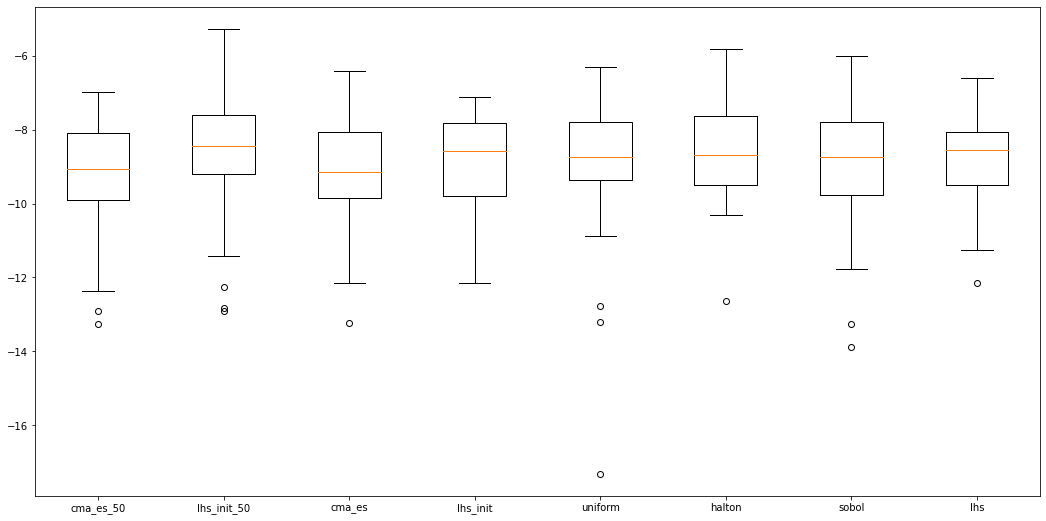

In [57]:
plt.rcParams["figure.figsize"] = (18, 9)

methods = ['cma_es_50', 'lhs_init_50', 'cma_es', 'lhs_init', 'uniform', 'halton', 'sobol', 'lhs']
plt.boxplot([np.log(stats[method + '_regret'].div(stats['abs_norm'])) for method in methods])
plt.xticks(list(range(1, len(methods) + 1)), methods)

([<matplotlib.axis.XTick at 0x7fc67b99fb50>,
 [Text(0, 0, 'cma_es_50'),
  Text(0, 0, 'lhs_init_50'),
  Text(0, 0, 'cma_es'),
  Text(0, 0, 'lhs_init'),
  Text(0, 0, 'uniform'),
  Text(0, 0, 'halton'),
  Text(0, 0, 'sobol'),
  Text(0, 0, 'lhs')])

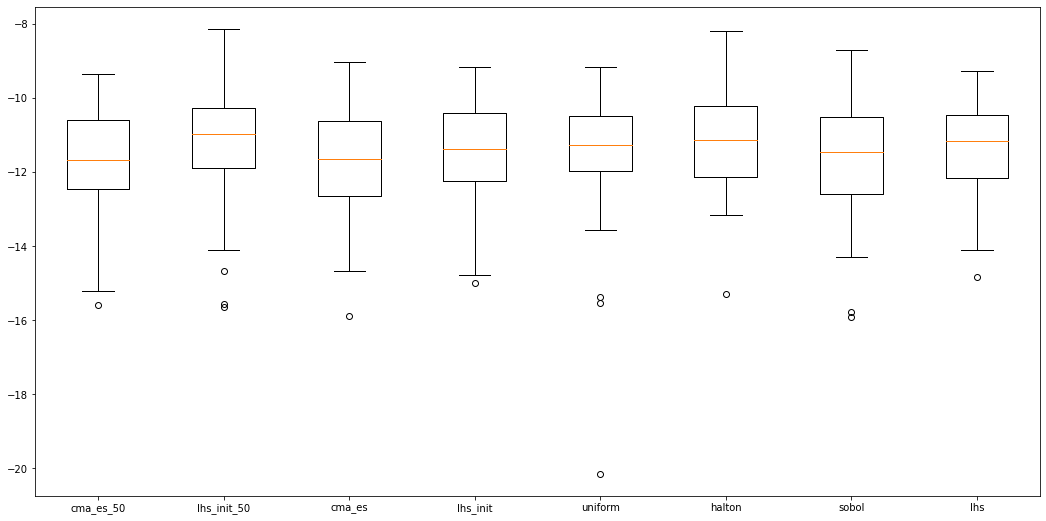

In [59]:
plt.rcParams["figure.figsize"] = (18, 9)

methods = ['cma_es_50', 'lhs_init_50', 'cma_es', 'lhs_init', 'uniform', 'halton', 'sobol', 'lhs']
plt.boxplot([np.log(stats[method + '_regret'].div(stats['minmax_norm'])) for method in methods])
plt.xticks(list(range(1, len(methods) + 1)), methods)